In [1]:
library('tidyverse')
library('Matrix')
library('vars')
library('tseries')
library('repr')
library('latex2exp')

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: urca
Loading required package: lmtest


In [2]:
sparsity <- function(dat){
    return (1 - nnzero(dat) / prod(dim(dat)))
}

In [19]:
thm <- theme_bw() + theme(text = element_text(size = 14, family = "Times New Roman"))

# Load data

## SRB

In [4]:
SRB <- read.table("/project2/arzhetsky/ylong/MarketScan/Sex_ratio/MSDX_day_20180922_newborn_geo_sex_mother.txt",
                header = FALSE,
                col.names = c("Study_ID", "Birthday", "FIPS", "MSA", "Sex", "Mother"),
                colClasses = c("NULL", "integer", "factor", "NULL", "factor", "NULL"))

In [5]:
SRB <- SRB %>% dplyr::filter(FIPS != "00000")

In [6]:
dim(SRB)

[1] 1428634       3

Need to exclude day 1 (December 31, 2002) because temperature data starts on January 1, 2003. 3 month = 91 days; 1 year = 52 weeks = 364 days

In [7]:
SRB_3mo <- dplyr::mutate(SRB, Period = (Birthday + 89) %/% 91) %>% dplyr::select(FIPS, Period, Sex)

In [8]:
SRB_1y <- dplyr::mutate(SRB, Period = (Birthday + 362) %/% 364) %>% dplyr::select(FIPS, Period, Sex)

### Total number of births by county

In [10]:
(SRB_3mo_county <- 
 SRB_3mo %>% group_by(Period, FIPS, Sex) %>% summarize(Count = n())
         %>% mutate(Total = sum(Count))
         %>% dplyr::select(-Sex, -Count)
         %>% distinct()
         %>% ungroup %>% dplyr::mutate(Period = as.factor(Period))
)

Period,FIPS,Total
0,02020,1
0,04013,2
0,04017,1
0,04019,1
0,05037,1
0,05119,2
0,06001,1
0,06013,1
0,06025,1
0,06037,4


In [9]:
(SRB_1y_county <- 
 SRB_1y %>% group_by(Period, FIPS, Sex) %>% summarize(Count = n())
        %>% mutate(Total = sum(Count))
        %>% dplyr::select(-Sex, -Count)
        %>% distinct()
        %>% ungroup %>% dplyr::mutate(Period = as.factor(Period))
)

Period,FIPS,Total
0,02020,1
0,04013,2
0,04017,1
0,04019,1
0,05037,1
0,05119,2
0,06001,1
0,06013,1
0,06025,1
0,06037,4


In [12]:
(SRB_3mo_weights <- SRB_3mo_county 
 %>% spread(Period, Total, fill = 0)
 %>% dplyr::rename(County = FIPS)
 %>% as_tibble()
)

print(sparsity(SRB_3mo_weights))

County,0,1,2,3,4,5,6,7,8,⋯,25,26,27,28,29,30,31,32,33,35
01001,0,4,0,3,5,1,7,9,4,⋯,7,10,9,3,5,4,6,8,0,0
01003,0,5,6,2,4,8,14,15,9,⋯,18,20,25,11,25,19,19,13,1,0
01005,0,2,1,1,0,3,0,3,2,⋯,2,1,2,1,6,0,3,3,0,0
01007,0,0,1,0,0,3,4,0,0,⋯,2,3,3,2,4,3,6,2,0,0
01009,0,1,4,3,1,5,6,0,1,⋯,11,7,5,5,2,11,9,4,0,0
01011,0,0,0,0,0,0,1,1,0,⋯,0,0,1,1,1,1,1,0,0,0
01013,0,0,1,0,0,4,3,1,0,⋯,0,2,1,1,2,3,0,2,0,0
01015,0,5,5,2,4,16,13,8,6,⋯,12,15,17,11,12,9,16,7,0,0
01017,0,3,1,3,2,3,2,5,3,⋯,2,2,2,2,2,2,1,3,0,0
01019,0,1,0,2,3,5,3,1,1,⋯,1,3,0,2,3,0,4,4,0,0


[1] 0.2882818


In [13]:
(SRB_1y_weights <- SRB_1y_county 
 %>% spread(Period, Total, fill = 0)
 %>% dplyr::rename(County = FIPS)
 %>% as_tibble()
)

print(sparsity(SRB_1y_weights))

County,0,1,2,3,4,5,6,7,8,9
01001,0,12,21,27,21,21,32,29,23,0
01003,0,17,46,46,57,48,71,74,76,1
01005,0,4,8,10,11,6,13,6,12,0
01007,0,1,7,1,10,13,12,10,15,0
01009,0,9,12,13,16,14,21,28,26,0
01011,0,0,2,3,6,3,1,2,3,0
01013,0,1,8,2,5,5,7,4,7,0
01015,0,16,43,25,35,41,36,55,44,0
01017,0,9,13,7,5,6,8,8,8,0
01019,0,6,10,11,10,9,8,6,11,0


[1] 0.2161655


### National average

In [14]:
(SRB_3mo_national <- sapply(SRB_3mo_weights, as.numeric)
 %>% colSums()
 %>% as_tibble()
 %>% dplyr::rename(Count = value)
 %>% slice(2:n())
 %>% rowid_to_column(var = "Period")
)

Period,Count
1,153
2,25262
3,26287
4,25912
5,17196
6,33792
7,34826
8,33936
9,24071
10,36930


Last period ($ 35 $) has only $ 1 $ birth recorded. Discard this when computing SRB.

In [15]:
(SRB_3mo_SRB <- SRB_3mo
 %>% group_by(Period, Sex) 
 %>% summarize(Count = n()) 
 %>% group_by(Period) 
 %>% mutate(Sum = sum(Count)) 
 %>% filter(Sex == "M") 
 %>% transmute(SRB = Count / Sum)
 %>% filter(Period > 0 & Period < 35)
)

Period,SRB
1,0.5217322
2,0.5151976
3,0.5168262
4,0.5147709
5,0.5153587
6,0.5144719
7,0.5214227
8,0.5196710
9,0.5130788
10,0.5125716


In [16]:
(SRB_1y_national <- sapply(SRB_1y_weights, as.numeric)
 %>% colSums()
 %>% as_tibble()
 %>% dplyr::rename(Count = value)
 %>% slice(2:n())
 %>% rowid_to_column(var = "Period")
)

Period,Count
1,153
2,94657
3,126625
4,142863
5,183312
6,188080
7,209630
8,243764
9,236776
10,2774


In [18]:
(SRB_1y_SRB <- SRB_1y
 %>% group_by(Period, Sex) 
 %>% summarize(Count = n()) 
 %>% group_by(Period) 
 %>% mutate(Sum = sum(Count)) 
 %>% filter(Sex == "M") 
 %>% transmute(SRB = Count / Sum)
 %>% filter(Period > 0)
)

Period,SRB
1,0.5173099
2,0.5175597
3,0.5148149
4,0.5123723
5,0.5122767
6,0.5142060
7,0.5148463
8,0.5127547
9,0.5165826


#### Test for unit root

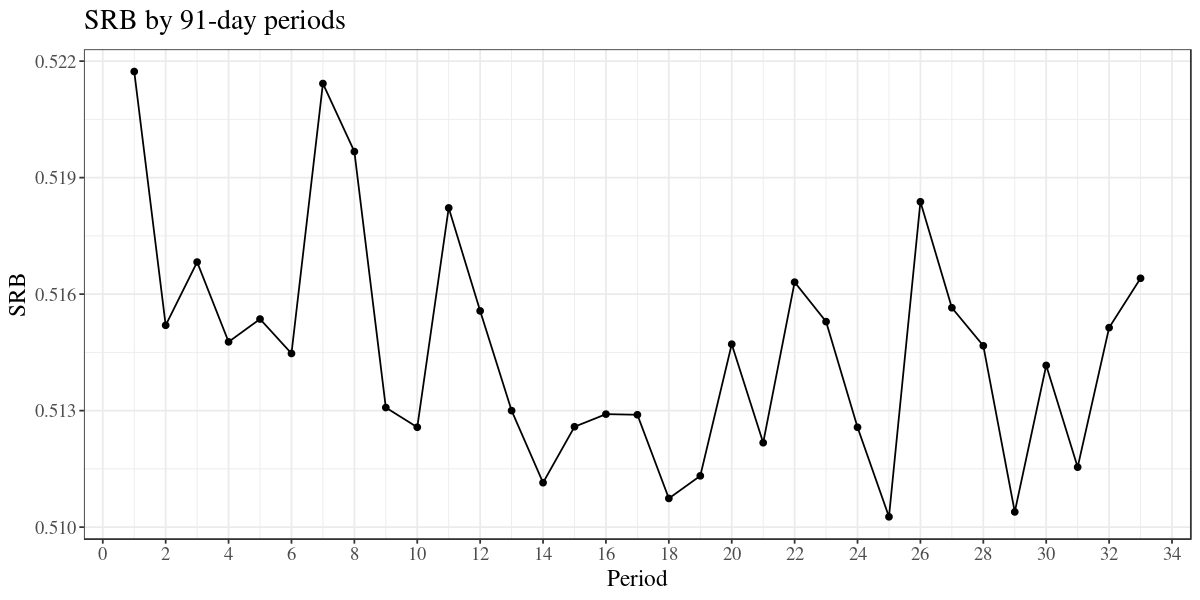

In [22]:
options(repr.plot.width = 10, repr.plot.height = 5)

gg_SRB_3mo <- ggplot(data = SRB_3mo_SRB, aes(x = Period, y = SRB)) +
    geom_point() + geom_line() +
    ggtitle(TeX('SRB by $ 91 $-day periods')) +
    scale_x_continuous(breaks = scales::pretty_breaks(15)) +
    thm

print(gg_SRB_3mo)

In [23]:
adf.test(x = SRB_3mo_SRB$SRB, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  SRB_3mo_SRB$SRB
Dickey-Fuller = -1.7049, Lag order = 3, p-value = 0.687
alternative hypothesis: stationary


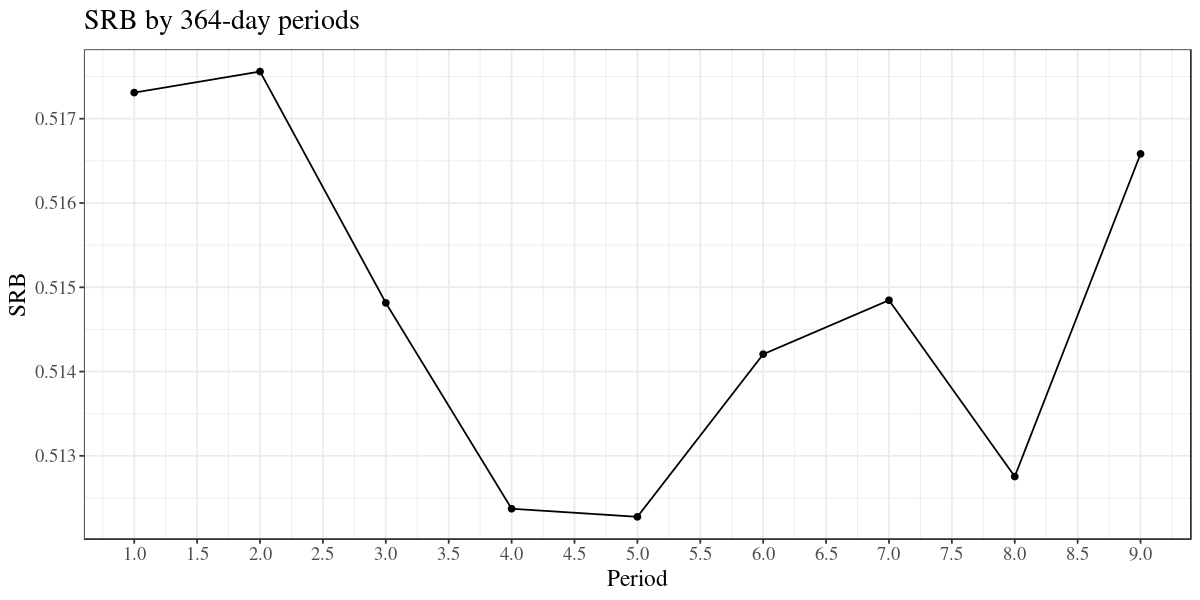

In [21]:
options(repr.plot.width = 10, repr.plot.height = 5)

gg_SRB_1y <- ggplot(data = SRB_1y_SRB, aes(x = Period, y = SRB)) +
    geom_point() + geom_line() +
    ggtitle(TeX('SRB by $ 364 $-day periods')) +
    scale_x_continuous(breaks = scales::pretty_breaks(15)) +
    thm

print(gg_SRB_1y)

In [24]:
adf.test(x = SRB_1y_SRB$SRB, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  SRB_1y_SRB$SRB
Dickey-Fuller = -0.50125, Lag order = 2, p-value = 0.9749
alternative hypothesis: stationary


## Temperature

In [26]:
consolidate <- function(dat, start, end, nperiod, lperiod){
    idx <- split(seq(dat[start:end]), rep(seq(nperiod), each = lperiod))
    result <- as.tibble(
        lapply(idx, function(i) {
            tmp <- dat[i + 1]
            rowMeans(tmp, na.rm = TRUE)
        })
    )
    
    return(result)
}

In [27]:
f_tmax <- "/project2/arzhetsky/ylong/MarketScan/Sex_ratio/weather/tasmax.prism.county_weekly_avg.csv"

In [28]:
f_tmin <- "/project2/arzhetsky/ylong/MarketScan/Sex_ratio/weather/tasmin.prism.county_weekly_avg.csv"

### By county

#### 91 days (13 weeks)

$ 33 \times 13 = 429 $ weeks

In [29]:
(temp_max_avg <- as.tibble(read.csv(file = f_tmax, header = TRUE))
 %>% dplyr::select(state.fips:X429)
 %>% dplyr::mutate(County = sprintf("%02d%03d", state.fips, county.fips))
 %>% dplyr::select(County, X1:X429)
 %>% ungroup %>% dplyr::mutate(County = as.factor(County))
 %>% as_tibble()
)

County,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429
01001,12.9470,11.92550,8.89397,9.43538,14.70570,11.54410,18.4844,15.3723,13.97730,⋯,6.53406,10.59360,15.2718,9.19547,10.64470,22.4392,23.9278,19.6067,17.5342,24.8908
01003,16.0407,14.35630,12.33930,13.11200,17.26820,14.12970,20.4554,17.1649,17.71770,⋯,9.48684,14.64810,17.1170,11.13560,12.66200,22.6030,25.2265,21.2471,19.7739,25.6076
01005,14.6072,13.41920,9.96652,10.91100,16.54770,13.27730,19.3873,16.8544,17.15760,⋯,7.73131,11.30620,15.7086,10.88990,11.80120,22.4939,24.8927,20.0241,18.5581,26.0771
01007,12.3432,10.94340,8.34228,8.77316,13.74040,10.65040,17.9817,15.2562,12.71960,⋯,5.68720,9.94425,15.0590,8.62856,10.11410,22.6337,23.1816,19.3933,17.1427,24.6069
01009,11.2477,8.85891,5.84377,6.49148,11.71620,8.26093,15.3968,12.9007,9.95274,⋯,3.46530,6.56532,13.3437,6.79987,9.29720,20.4079,20.3961,17.5082,14.6409,22.2295
01011,13.8064,13.00620,9.37950,10.20310,16.08240,12.66680,18.9213,16.2768,16.25000,⋯,7.02772,10.65050,15.2079,10.32160,11.45180,22.2221,24.5097,19.5063,17.9470,25.2764
01013,14.3325,13.53370,10.06790,10.85870,16.56350,12.79390,19.5484,16.2949,16.56810,⋯,7.90008,12.49060,16.0262,10.27650,11.69660,22.6642,24.9661,20.5341,19.0033,26.0912
01015,11.5415,9.21110,5.94048,7.22785,12.18250,8.99303,15.7552,13.5711,10.49800,⋯,4.29430,7.58666,13.8472,7.88784,9.81951,20.6386,21.4566,18.0498,15.3459,22.9552
01017,13.2071,11.98260,8.21277,9.22885,14.78560,10.95320,17.8703,16.1009,12.87950,⋯,5.86055,9.29109,14.5823,8.86993,11.14970,21.4446,23.2205,18.2315,16.8237,23.9713
01019,11.3270,8.83580,5.42304,7.03193,11.08730,8.63675,13.9499,12.5898,9.81750,⋯,3.28231,6.26301,12.7685,7.56818,9.17593,19.4884,20.2775,17.3365,14.5206,22.1626


In [40]:
temp_max_avg_3mo <- consolidate(temp_max_avg, 2, 430, 33, 13)

In [38]:
(temp_min_avg <- as.tibble(read.csv(file = f_tmin, header = TRUE))
 %>% dplyr::select(state.fips:X429)
 %>% dplyr::mutate(County = sprintf("%02d%03d", state.fips, county.fips))
 %>% dplyr::select(County, X1:X429)
 %>% ungroup %>% dplyr::mutate(County = as.factor(County))
 %>% as_tibble()
)

County,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429
01001,2.67265,-0.7456920,-4.72885,-3.853200,1.81860000,0.8434030,3.294250,4.78136,6.095580,⋯,-5.07976,-0.9951220,0.2731090,0.288432,-3.708590,4.69215,8.13696,6.60786,4.03203,7.83357
01003,3.30995,1.0943500,-1.98800,-0.325747,3.59243000,3.2510100,5.854340,5.56263,9.143890,⋯,-2.37784,1.2014500,2.9992000,1.675140,-1.819100,6.86455,13.22160,8.73417,5.50122,9.32435
01005,2.49092,-0.0101399,-4.76674,-2.694770,1.73783000,2.0220600,2.289460,4.08311,6.301220,⋯,-4.53395,-0.7116260,1.3381600,2.433290,-1.576360,4.72575,8.63472,8.08908,4.29752,8.47456
01007,1.86134,-1.6299100,-5.92319,-4.971380,0.75197400,-0.4982480,2.308300,4.47008,4.779050,⋯,-5.19212,-0.6109580,0.3556150,-0.338536,-4.214820,5.64240,7.86359,5.98478,3.92371,8.07809
01009,1.76689,-2.5121700,-6.13135,-7.306160,-0.21879700,-1.6963500,1.877070,3.23260,2.883490,⋯,-7.28240,-1.7378100,-0.4521770,-1.596490,-5.097590,5.07983,5.68731,4.50797,3.74772,7.81675
01011,2.13476,-0.8245660,-5.38525,-3.485820,0.85709200,1.0041800,1.959710,3.76501,6.030620,⋯,-5.37316,-1.4786700,0.0807542,1.612480,-2.599490,3.65868,7.68305,7.14420,3.60145,7.42202
01013,2.06345,-1.3468200,-5.21862,-3.632320,1.15210000,1.2372200,2.089530,3.55182,6.199620,⋯,-4.40573,-0.8726320,0.4028320,1.438740,-2.403230,4.25821,9.67410,7.57412,3.89022,7.55781
01015,1.42722,-2.1703600,-6.41430,-6.402050,0.00111246,-1.1014500,1.493100,3.11904,3.237340,⋯,-6.75069,-1.4246600,-0.5404700,-0.843790,-5.204120,4.14026,5.70402,4.89120,3.42172,6.83922
01017,1.01374,-1.5704100,-6.74464,-4.263410,-0.49273600,-0.0242444,1.237880,2.74905,4.106420,⋯,-6.48319,-2.1900600,-0.9688460,-0.247191,-4.077770,2.65480,5.90788,5.78811,2.74594,5.96191
01019,1.31155,-3.0128600,-7.14454,-7.382360,-0.43259700,-1.7723400,0.770780,2.60669,2.596890,⋯,-7.27723,-1.9950500,-0.9179960,-1.359830,-5.460330,4.50382,5.19556,4.26727,3.20696,6.59112


In [39]:
temp_min_avg_3mo <- consolidate(temp_min_avg, 2, 430, 33, 13)

#### 364 days (52 weeks)

$ 9 \times 52 = 468 $ weeks

In [33]:
(temp_max_avg.2 <- as.tibble(read.csv(file = f_tmax, header = TRUE))
 %>% dplyr::select(state.fips:X468)
 %>% dplyr::mutate(County = sprintf("%02d%03d", state.fips, county.fips))
 %>% dplyr::select(County, X1:X468)
 %>% ungroup %>% dplyr::mutate(County = as.factor(County))
 %>% as_tibble()
)

County,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468
01001,12.9470,11.92550,8.89397,9.43538,14.70570,11.54410,18.4844,15.3723,13.97730,⋯,24.7741,21.7577,22.7107,20.3648,20.4767,20.6527,21.5254,13.6188,12.82320,17.5242
01003,16.0407,14.35630,12.33930,13.11200,17.26820,14.12970,20.4554,17.1649,17.71770,⋯,27.5689,23.5442,24.2941,22.1881,22.2965,23.1184,23.3023,16.5831,14.47350,19.2247
01005,14.6072,13.41920,9.96652,10.91100,16.54770,13.27730,19.3873,16.8544,17.15760,⋯,25.1517,21.7510,23.9510,21.3824,20.7088,22.7908,23.2515,14.6003,15.34340,18.7855
01007,12.3432,10.94340,8.34228,8.77316,13.74040,10.65040,17.9817,15.2562,12.71960,⋯,24.7894,21.2705,21.9787,20.2451,20.6675,20.4296,20.7369,13.5965,11.47670,17.0792
01009,11.2477,8.85891,5.84377,6.49148,11.71620,8.26093,15.3968,12.9007,9.95274,⋯,23.3430,19.5374,19.8196,18.3198,19.0671,18.5379,18.4508,12.3743,10.30250,15.0799
01011,13.8064,13.00620,9.37950,10.20310,16.08240,12.66680,18.9213,16.2768,16.25000,⋯,24.6232,21.4482,23.4247,20.8961,20.3445,21.8343,22.5701,14.0383,14.43980,18.1163
01013,14.3325,13.53370,10.06790,10.85870,16.56350,12.79390,19.5484,16.2949,16.56810,⋯,25.9648,22.5991,24.0990,21.3776,21.1800,22.1680,22.7270,15.1449,14.16310,18.8366
01015,11.5415,9.21110,5.94048,7.22785,12.18250,8.99303,15.7552,13.5711,10.49800,⋯,22.9753,19.7324,20.5865,18.9520,19.1059,18.7750,19.4568,12.7342,12.39670,16.0143
01017,13.2071,11.98260,8.21277,9.22885,14.78560,10.95320,17.8703,16.1009,12.87950,⋯,23.6216,20.7836,22.3048,19.7364,19.6227,20.4380,21.3047,13.4515,14.13970,17.0716
01019,11.3270,8.83580,5.42304,7.03193,11.08730,8.63675,13.9499,12.5898,9.81750,⋯,22.6690,19.1969,19.7511,18.5764,18.8146,18.0013,18.5452,12.1426,11.92400,14.9421


In [41]:
temp_max_avg_1y <- consolidate(temp_max_avg.2, 2, 469, 9, 52)

In [44]:
(temp_min_avg.2 <- as.tibble(read.csv(file = f_tmin, header = TRUE))
 %>% dplyr::select(state.fips:X468)
 %>% dplyr::mutate(County = sprintf("%02d%03d", state.fips, county.fips))
 %>% dplyr::select(County, X1:X468)
 %>% ungroup %>% dplyr::mutate(County = as.factor(County))
 %>% as_tibble()
)

County,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468
01001,2.67265,-0.7456920,-4.72885,-3.853200,1.81860000,0.8434030,3.294250,4.78136,6.095580,⋯,12.1254,4.58037,5.23837,4.14583,5.13112,9.19056,7.53510,0.6651260,1.232330,3.91091
01003,3.30995,1.0943500,-1.98800,-0.325747,3.59243000,3.2510100,5.854340,5.56263,9.143890,⋯,14.0232,5.89211,7.52418,6.34876,7.06175,11.98230,11.15100,2.9740300,3.009580,7.11061
01005,2.49092,-0.0101399,-4.76674,-2.694770,1.73783000,2.0220600,2.289460,4.08311,6.301220,⋯,12.9190,5.54180,7.00288,4.76560,5.58870,9.33516,9.02001,1.7689900,3.282100,4.88212
01007,1.86134,-1.6299100,-5.92319,-4.971380,0.75197400,-0.4982480,2.308300,4.47008,4.779050,⋯,12.3747,4.23218,4.68228,3.51474,5.10834,9.19896,7.13437,0.9559830,0.776638,3.95300
01009,1.76689,-2.5121700,-6.13135,-7.306160,-0.21879700,-1.6963500,1.877070,3.23260,2.883490,⋯,11.5729,4.50950,4.03661,3.50388,5.15804,8.45077,6.87550,1.3813200,0.515231,3.34409
01011,2.13476,-0.8245660,-5.38525,-3.485820,0.85709200,1.0041800,1.959710,3.76501,6.030620,⋯,12.2178,4.52687,5.68558,3.73807,4.71156,8.84849,8.01987,0.7982670,2.198230,3.70457
01013,2.06345,-1.3468200,-5.21862,-3.632320,1.15210000,1.2372200,2.089530,3.55182,6.199620,⋯,12.5779,4.87313,5.85565,3.95237,5.04863,10.05230,8.53237,1.4667500,2.290890,4.65724
01015,1.42722,-2.1703600,-6.41430,-6.402050,0.00111246,-1.1014500,1.493100,3.11904,3.237340,⋯,11.2798,4.12500,3.65007,2.56548,3.80201,7.82096,6.61142,0.4310650,1.126600,3.07017
01017,1.01374,-1.5704100,-6.74464,-4.263410,-0.49273600,-0.0242444,1.237880,2.74905,4.106420,⋯,10.9471,3.81356,4.31749,2.50945,3.65746,7.88040,6.95025,-0.5261200,1.674200,2.50176
01019,1.31155,-3.0128600,-7.14454,-7.382360,-0.43259700,-1.7723400,0.770780,2.60669,2.596890,⋯,10.9316,4.16523,3.38132,1.91455,3.00949,7.24344,6.55280,0.1821600,0.848666,3.03080


In [47]:
temp_min_avg_1y <- consolidate(temp_min_avg.2, 2, 469, 9, 52)

### National average

#### 91 days (13 weeks)

In [49]:
(temp_max_avg_3mo <- sapply(temp_max_avg_3mo, as.numeric)
 %>% colMeans()
)

1         2         3         4         5         6         7         8 
 8.026891 22.847898 29.016176 14.232745  8.656094 23.284001 27.975852 14.404622 
        9        10        11        12        13        14        15        16 
 8.862827 23.044939 30.087816 14.397186 10.269065 24.168206 29.307413 14.979235 
       17        18        19        20        21        22        23        24 
 8.546206 23.085448 29.805806 15.752140  7.940007 22.012908 28.892720 14.658356 
       25        26        27        28        29        30        31        32 
 8.625719 21.632057 28.541554 14.185699  6.012296 23.023455 30.162378 15.798785 
       33 
 7.244005

In [50]:
(temp_min_avg_3mo <- sapply(temp_min_avg_3mo, as.numeric)
 %>% colMeans()
)

1         2         3         4         5         6         7         8 
-3.685798 10.414474 16.251391  2.060160 -2.978709 10.654747 15.613685  3.012027 
        9        10        11        12        13        14        15        16 
-2.350929  9.939177 17.128983  1.950577 -1.751055 10.616622 16.583009  2.358786 
       17        18        19        20        21        22        23        24 
-3.057802  9.984155 16.842832  3.310752 -4.110815  8.976494 16.203320  2.115617 
       25        26        27        28        29        30        31        32 
-4.052116  9.286467 16.149221  3.009434 -4.354742 10.086654 17.435784  2.540851 
       33 
-4.341045

In [51]:
(temp_diff_avg_3mo <- 
 temp_max_avg_3mo - temp_min_avg_3mo
)

1        2        3        4        5        6        7        8 
11.71269 12.43342 12.76479 12.17258 11.63480 12.62925 12.36217 11.39259 
       9       10       11       12       13       14       15       16 
11.21376 13.10576 12.95883 12.44661 12.02012 13.55158 12.72440 12.62045 
      17       18       19       20       21       22       23       24 
11.60401 13.10129 12.96297 12.44139 12.05082 13.03641 12.68940 12.54274 
      25       26       27       28       29       30       31       32 
12.67783 12.34559 12.39233 11.17626 10.36704 12.93680 12.72659 13.25793 
      33 
11.58505

In [52]:
(temp_mean_avg_3mo <- 
 (temp_max_avg_3mo + temp_min_avg_3mo) / 2
)

1         2         3         4         5         6         7         8 
 2.170547 16.631186 22.633784  8.146453  2.838693 16.969374 21.794769  8.708325 
        9        10        11        12        13        14        15        16 
 3.255949 16.492058 23.608400  8.173882  4.259005 17.392414 22.945211  8.669011 
       17        18        19        20        21        22        23        24 
 2.744202 16.534801 23.324319  9.531446  1.914596 15.494701 22.548020  8.386986 
       25        26        27        28        29        30        31        32 
 2.286801 15.459262 22.345388  8.597567  0.828777 16.555054 23.799081  9.169818 
       33 
 1.451480

In [53]:
(temp_max_avg_1y <- sapply(temp_max_avg_1y, as.numeric)
 %>% colMeans()
)

1        2        3        4        5        6        7        8 
18.53093 18.58014 19.09819 19.68098 19.29740 18.37600 18.24626 18.74923 
       9 
18.95760

In [54]:
(temp_min_avg_1y <- sapply(temp_min_avg_1y, as.numeric)
 %>% colMeans()
)

1        2        3        4        5        6        7        8 
6.260057 6.575438 6.666952 6.951841 6.769984 5.796154 6.098252 6.427137 
       9 
6.519521

In [55]:
(temp_diff_avg_1y <- 
 temp_max_avg_1y - temp_min_avg_1y
)

1        2        3        4        5        6        7        8 
12.27087 12.00470 12.43124 12.72914 12.52742 12.57984 12.14801 12.32209 
       9 
12.43808

In [56]:
(temp_mean_avg_1y <- 
 (temp_max_avg_1y + temp_min_avg_1y) / 2
)

1        2        3        4        5        6        7        8 
12.39549 12.57779 12.88257 13.31641 13.03369 12.08608 12.17225 12.58818 
       9 
12.73856

# Test for correlation

In [57]:
cor.test(x = temp_max_avg_3mo, y = SRB_3mo_SRB$SRB)


	Pearson's product-moment correlation

data:  temp_max_avg_3mo and SRB_3mo_SRB$SRB
t = 0.53564, df = 31, p-value = 0.596
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2559623  0.4250953
sample estimates:
       cor 
0.09576163 


In [58]:
cor.test(x = temp_min_avg_3mo, y = SRB_3mo_SRB$SRB)


	Pearson's product-moment correlation

data:  temp_min_avg_3mo and SRB_3mo_SRB$SRB
t = 0.63434, df = 31, p-value = 0.5305
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2394153  0.4394298
sample estimates:
      cor 
0.1131979 


In [59]:
cor.test(x = temp_diff_avg_3mo, y = SRB_3mo_SRB$SRB)


	Pearson's product-moment correlation

data:  temp_diff_avg_3mo and SRB_3mo_SRB$SRB
t = -0.733, df = 31, p-value = 0.4691
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4535115  0.2227668
sample estimates:
       cor 
-0.1305244 


In [60]:
cor.test(x = temp_mean_avg_3mo, y = SRB_3mo_SRB$SRB)


	Pearson's product-moment correlation

data:  temp_mean_avg_3mo and SRB_3mo_SRB$SRB
t = 0.58383, df = 31, p-value = 0.5636
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2478967  0.4321254
sample estimates:
      cor 
0.1042877 


In [61]:
cor.test(x = temp_max_avg_1y, y = SRB_1y_SRB$SRB)


	Pearson's product-moment correlation

data:  temp_max_avg_1y and SRB_1y_SRB$SRB
t = -1.6423, df = 7, p-value = 0.1445
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8824367  0.2104396
sample estimates:
       cor 
-0.5273886 


In [62]:
cor.test(x = temp_min_avg_1y, y = SRB_1y_SRB$SRB)


	Pearson's product-moment correlation

data:  temp_min_avg_1y and SRB_1y_SRB$SRB
t = -0.75744, df = 7, p-value = 0.4735
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7941850  0.4758762
sample estimates:
       cor 
-0.2752287 


In [64]:
cor.test(x = temp_diff_avg_1y, y = SRB_1y_SRB$SRB)


	Pearson's product-moment correlation

data:  temp_diff_avg_1y and SRB_1y_SRB$SRB
t = -2.3361, df = 7, p-value = 0.05214
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.921110029  0.004001703
sample estimates:
      cor 
-0.661879 


In [65]:
cor.test(x = temp_mean_avg_1y, y = SRB_1y_SRB$SRB)


	Pearson's product-moment correlation

data:  temp_mean_avg_1y and SRB_1y_SRB$SRB
t = -1.2619, df = 7, p-value = 0.2474
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8512449  0.3271629
sample estimates:
      cor 
-0.430495 


# VAR and causality

## Temperature

In [66]:
(var_tmax_SRB_3mo_national <- cbind(temp_max_avg_3mo, SRB_3mo_SRB$SRB)
 %>% magrittr::set_colnames(c("t_max", "SRB"))
)

,t_max,SRB
1,8.026891,0.5217322
2,22.847898,0.5151976
3,29.016176,0.5168262
4,14.232745,0.5147709
5,8.656094,0.5153587
6,23.284001,0.5144719
7,27.975852,0.5214227
8,14.404622,0.5196710
9,8.862827,0.5130788
10,23.044939,0.5125716


In [67]:
(var_tmin_SRB_3mo_national <- cbind(temp_min_avg_3mo, SRB_3mo_SRB$SRB)
 %>% magrittr::set_colnames(c("t_min", "SRB"))
)

,t_min,SRB
1,-3.685798,0.5217322
2,10.414474,0.5151976
3,16.251391,0.5168262
4,2.060160,0.5147709
5,-2.978709,0.5153587
6,10.654747,0.5144719
7,15.613685,0.5214227
8,3.012027,0.5196710
9,-2.350929,0.5130788
10,9.939177,0.5125716


In [68]:
(var_tdiff_SRB_3mo_national <- cbind(temp_diff_avg_3mo, SRB_3mo_SRB$SRB)
 %>% magrittr::set_colnames(c("t_diff", "SRB"))
)

,t_diff,SRB
1,11.71269,0.5217322
2,12.43342,0.5151976
3,12.76479,0.5168262
4,12.17258,0.5147709
5,11.63480,0.5153587
6,12.62925,0.5144719
7,12.36217,0.5214227
8,11.39259,0.5196710
9,11.21376,0.5130788
10,13.10576,0.5125716


In [69]:
(var_tmean_SRB_3mo_national <- cbind(temp_mean_avg_3mo, SRB_3mo_SRB$SRB)
 %>% magrittr::set_colnames(c("t_mean", "SRB"))
)

,t_mean,SRB
1,2.170547,0.5217322
2,16.631186,0.5151976
3,22.633784,0.5168262
4,8.146453,0.5147709
5,2.838693,0.5153587
6,16.969374,0.5144719
7,21.794769,0.5214227
8,8.708325,0.5196710
9,3.255949,0.5130788
10,16.492058,0.5125716


In [70]:
(var_tmax_SRB_1y_national <- cbind(temp_max_avg_1y, SRB_1y_SRB$SRB)
 %>% magrittr::set_colnames(c("t_max", "SRB"))
)

,t_max,SRB
1,18.53093,0.5173099
2,18.58014,0.5175597
3,19.09819,0.5148149
4,19.68098,0.5123723
5,19.29740,0.5122767
6,18.37600,0.5142060
7,18.24626,0.5148463
8,18.74923,0.5127547
9,18.95760,0.5165826


In [71]:
(var_tmin_SRB_1y_national <- cbind(temp_min_avg_1y, SRB_1y_SRB$SRB)
 %>% magrittr::set_colnames(c("t_min", "SRB"))
)

,t_min,SRB
1,6.260057,0.5173099
2,6.575438,0.5175597
3,6.666952,0.5148149
4,6.951841,0.5123723
5,6.769984,0.5122767
6,5.796154,0.5142060
7,6.098252,0.5148463
8,6.427137,0.5127547
9,6.519521,0.5165826


In [72]:
(var_tdiff_SRB_1y_national <- cbind(temp_diff_avg_1y, SRB_1y_SRB$SRB)
 %>% magrittr::set_colnames(c("t_diff", "SRB"))
)

,t_diff,SRB
1,12.27087,0.5173099
2,12.00470,0.5175597
3,12.43124,0.5148149
4,12.72914,0.5123723
5,12.52742,0.5122767
6,12.57984,0.5142060
7,12.14801,0.5148463
8,12.32209,0.5127547
9,12.43808,0.5165826


In [73]:
(var_tmean_SRB_1y_national <- cbind(temp_mean_avg_1y, SRB_1y_SRB$SRB)
 %>% magrittr::set_colnames(c("t_mean", "SRB"))
)

,t_mean,SRB
1,12.39549,0.5173099
2,12.57779,0.5175597
3,12.88257,0.5148149
4,13.31641,0.5123723
5,13.03369,0.5122767
6,12.08608,0.5142060
7,12.17225,0.5148463
8,12.58818,0.5127547
9,12.73856,0.5165826


### Temperature (max)

In [102]:
VARselect(y = var_tmax_SRB_3mo_national, lag.max = 4, season = 4)

,1,2,3,4
AIC(n),-1.161779e+01,-1.153338e+01,-1.131397e+01,-1.153851e+01
HQ(n),-1.144060e+01,-1.129712e+01,-1.101865e+01,-1.118412e+01
SC(n),-1.105201e+01,-1.077901e+01,-1.037101e+01,-1.040696e+01
FPE(n),9.114274e-06,1.008928e-05,1.294191e-05,1.083241e-05


In [100]:
fit_tmax_SRB_3mo_national <- VAR(y = var_tmax_SRB_3mo_national, 
                                 p = 1, lag.max = 1,
                                 season = 4)
summary(fit_tmax_SRB_3mo_national)


VAR Estimation Results:
Endogenous variables: t_max, SRB 
Deterministic variables: const 
Sample size: 32 
Log Likelihood: 110.839 
Roots of the characteristic polynomial:
0.3017 0.09785
Call:
VAR(y = var_tmax_SRB_3mo_national, p = 1, season = 4L, lag.max = 1)


Estimation results for equation t_max: 
t_max = t_max.l1 + SRB.l1 + const + sd1 + sd2 + sd3 

         Estimate Std. Error t value Pr(>|t|)    
t_max.l1   0.1790     0.2044   0.876   0.3890    
SRB.l1   -35.1498    58.4990  -0.601   0.5531    
const     33.5112    31.4560   1.065   0.2965    
sd1       -3.9618     2.9876  -1.326   0.1964    
sd2       11.7592     4.3170   2.724   0.0114 *  
sd3       15.5137     1.3927  11.139 2.14e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.8993 on 26 degrees of freedom
Multiple R-Squared: 0.9897,	Adjusted R-squared: 0.9877 
F-statistic: 499.4 on 5 and 26 DF,  p-value: < 2.2e-16 


Estimation results for equation SRB: 
SRB = t_max.l1

In [101]:
causality(x = fit_tmax_SRB_3mo_national, cause = "t_max")

$Granger

	Granger causality H0: t_max do not Granger-cause SRB

data:  VAR object fit_tmax_SRB_3mo_national
F-Test = 0.22423, df1 = 1, df2 = 52, p-value = 0.6378


$Instant

	H0: No instantaneous causality between: t_max and SRB

data:  VAR object fit_tmax_SRB_3mo_national
Chi-squared = 2.7107, df = 1, p-value = 0.09968



In [76]:
VARselect(y = var_tmax_SRB_1y_national, lag.max = 1)

,1
AIC(n),-1.357881e+01
HQ(n),-1.398066e+01
SC(n),-1.351923e+01
FPE(n),1.368359e-06


In [78]:
fit_tmax_SRB_1y_national <- VAR(y = var_tmax_SRB_1y_national, 
                                 p = 1, lag.max = 1)
summary(fit_tmax_SRB_1y_national)


VAR Estimation Results:
Endogenous variables: t_max, SRB 
Deterministic variables: const 
Sample size: 8 
Log Likelihood: 37.612 
Roots of the characteristic polynomial:
0.4951 0.4951
Call:
VAR(y = var_tmax_SRB_1y_national, p = 1, lag.max = 1)


Estimation results for equation t_max: 
t_max = t_max.l1 + SRB.l1 + const 

         Estimate Std. Error t value Pr(>|t|)
t_max.l1   0.6985     0.4439   1.573    0.176
SRB.l1   110.2988   106.1320   1.039    0.346
const    -51.0233    59.9746  -0.851    0.434


Residual standard error: 0.4667 on 5 degrees of freedom
Multiple R-Squared: 0.3325,	Adjusted R-squared: 0.06554 
F-statistic: 1.245 on 2 and 5 DF,  p-value: 0.364 


Estimation results for equation SRB: 
SRB = t_max.l1 + SRB.l1 + const 

          Estimate Std. Error t value Pr(>|t|)
t_max.l1 -0.001344   0.001958  -0.686    0.523
SRB.l1    0.138601   0.468164   0.296    0.779
const     0.468413   0.264557   1.771    0.137


Residual standard error: 0.002059 on 5 degrees of freedom
Multi

In [79]:
causality(x = fit_tmax_SRB_1y_national, cause = "t_max")

$Granger

	Granger causality H0: t_max do not Granger-cause SRB

data:  VAR object fit_tmax_SRB_1y_national
F-Test = 0.47124, df1 = 1, df2 = 10, p-value = 0.508


$Instant

	H0: No instantaneous causality between: t_max and SRB

data:  VAR object fit_tmax_SRB_1y_national
Chi-squared = 1.4214, df = 1, p-value = 0.2332



### Temperature (min)

In [107]:
VARselect(y = var_tmin_SRB_3mo_national, lag.max = 4, season = 4)

,1,2,3,4
AIC(n),-1.211840e+01,-1.213378e+01,-1.202605e+01,-1.210820e+01
HQ(n),-1.194121e+01,-1.189752e+01,-1.173072e+01,-1.175382e+01
SC(n),-1.155262e+01,-1.137941e+01,-1.108308e+01,-1.097665e+01
FPE(n),5.524710e-06,5.534922e-06,6.349646e-06,6.127896e-06


In [110]:
fit_tmin_SRB_3mo_national <- VAR(y = var_tmin_SRB_3mo_national, 
                                 p = 1, lag.max = 1,
                                 season = 4)
summary(fit_tmin_SRB_3mo_national)


VAR Estimation Results:
Endogenous variables: t_min, SRB 
Deterministic variables: const 
Sample size: 32 
Log Likelihood: 118.367 
Roots of the characteristic polynomial:
0.2012 0.2012
Call:
VAR(y = var_tmin_SRB_3mo_national, p = 1, season = 4L, lag.max = 1)


Estimation results for equation t_min: 
t_min = t_min.l1 + SRB.l1 + const + sd1 + sd2 + sd3 

          Estimate Std. Error t value Pr(>|t|)    
t_min.l1   0.04382    0.20380   0.215   0.8314    
SRB.l1    31.41609   45.24414   0.694   0.4936    
const    -10.02391   23.53420  -0.426   0.6737    
sd1       -5.29553    2.87467  -1.842   0.0769 .  
sd2        8.37343    4.06893   2.058   0.0498 *  
sd3       14.30628    1.38875  10.302 1.14e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.7181 on 26 degrees of freedom
Multiple R-Squared: 0.9926,	Adjusted R-squared: 0.9912 
F-statistic: 700.9 on 5 and 26 DF,  p-value: < 2.2e-16 


Estimation results for equation SRB: 
SRB = t_

In [111]:
causality(x = fit_tmin_SRB_3mo_national, cause = "t_min")

$Granger

	Granger causality H0: t_min do not Granger-cause SRB

data:  VAR object fit_tmin_SRB_3mo_national
F-Test = 1.8972, df1 = 1, df2 = 52, p-value = 0.1743


$Instant

	H0: No instantaneous causality between: t_min and SRB

data:  VAR object fit_tmin_SRB_3mo_national
Chi-squared = 1.6501, df = 1, p-value = 0.1989



In [80]:
VARselect(y = var_tmin_SRB_1y_national, lag.max = 1)

,1
AIC(n),-1.392432e+01
HQ(n),-1.432618e+01
SC(n),-1.386474e+01
FPE(n),9.686040e-07


In [81]:
fit_tmin_SRB_1y_national <- VAR(y = var_tmin_SRB_1y_national, 
                                 p = 1, lag.max = 1)
summary(fit_tmin_SRB_1y_national)


VAR Estimation Results:
Endogenous variables: t_min, SRB 
Deterministic variables: const 
Sample size: 8 
Log Likelihood: 38.994 
Roots of the characteristic polynomial:
0.4929 0.4929
Call:
VAR(y = var_tmin_SRB_1y_national, p = 1, lag.max = 1)


Estimation results for equation t_min: 
t_min = t_min.l1 + SRB.l1 + const 

         Estimate Std. Error t value Pr(>|t|)
t_min.l1   0.4575     0.3816   1.199    0.284
SRB.l1    90.3741    69.7305   1.296    0.252
const    -42.9712    36.7343  -1.170    0.295


Residual standard error: 0.3625 on 5 degrees of freedom
Multiple R-Squared: 0.3214,	Adjusted R-squared: 0.04996 
F-statistic: 1.184 on 2 and 5 DF,  p-value: 0.3793 


Estimation results for equation SRB: 
SRB = t_min.l1 + SRB.l1 + const 

          Estimate Std. Error t value Pr(>|t|)
t_min.l1 -0.001439   0.002173  -0.662    0.537
SRB.l1    0.246949   0.397192   0.622    0.561
const     0.396637   0.209242   1.896    0.117


Residual standard error: 0.002065 on 5 degrees of freedom
Mult

In [82]:
causality(x = fit_tmin_SRB_1y_national, cause = "t_min")

$Granger

	Granger causality H0: t_min do not Granger-cause SRB

data:  VAR object fit_tmin_SRB_1y_national
F-Test = 0.43819, df1 = 1, df2 = 10, p-value = 0.523


$Instant

	H0: No instantaneous causality between: t_min and SRB

data:  VAR object fit_tmin_SRB_1y_national
Chi-squared = 0.63253, df = 1, p-value = 0.4264



### Temperature (diff)

In [112]:
VARselect(y = var_tdiff_SRB_3mo_national, lag.max = 4, season = 4)

,1,2,3,4
AIC(n),-1.296617e+01,-1.271430e+01,-1.269115e+01,-1.283199e+01
HQ(n),-1.278898e+01,-1.247804e+01,-1.239582e+01,-1.247760e+01
SC(n),-1.240040e+01,-1.195993e+01,-1.174818e+01,-1.170044e+01
FPE(n),2.366608e-06,3.097363e-06,3.265131e-06,2.971485e-06


In [113]:
fit_tdiff_SRB_3mo_national <- VAR(y = var_tdiff_SRB_3mo_national, 
                                  p = 1, lag.max = 1,
                                  season = 4)
summary(fit_tdiff_SRB_3mo_national)


VAR Estimation Results:
Endogenous variables: t_diff, SRB 
Deterministic variables: const 
Sample size: 32 
Log Likelihood: 131.973 
Roots of the characteristic polynomial:
0.3686 0.3686
Call:
VAR(y = var_tdiff_SRB_3mo_national, p = 1, season = 4L, lag.max = 1)


Estimation results for equation t_diff: 
t_diff = t_diff.l1 + SRB.l1 + const + sd1 + sd2 + sd3 

          Estimate Std. Error t value Pr(>|t|)  
t_diff.l1   0.2448     0.1747   1.401   0.1729  
SRB.l1    -68.4229    30.4599  -2.246   0.0334 *
const      44.5479    16.3989   2.717   0.0116 *
sd1        -0.5285     0.2492  -2.121   0.0436 *
sd2         0.7707     0.3107   2.481   0.0199 *
sd3         0.3091     0.2397   1.290   0.2084  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.4715 on 26 degrees of freedom
Multiple R-Squared: 0.6208,	Adjusted R-squared: 0.5479 
F-statistic: 8.514 on 5 and 26 DF,  p-value: 7.067e-05 


Estimation results for equation SRB: 
SRB = t_diff.l1 +

In [115]:
causality(x = fit_tdiff_SRB_3mo_national, cause = "t_diff")

$Granger

	Granger causality H0: t_diff do not Granger-cause SRB

data:  VAR object fit_tdiff_SRB_3mo_national
F-Test = 0.97042, df1 = 1, df2 = 52, p-value = 0.3291


$Instant

	H0: No instantaneous causality between: t_diff and SRB

data:  VAR object fit_tdiff_SRB_3mo_national
Chi-squared = 2.7426, df = 1, p-value = 0.09771



In [112]:
VARselect(y = var_tdiff_SRB_1y_national, lag.max = 1)

,1,2,3,4
AIC(n),-1.296617e+01,-1.271430e+01,-1.269115e+01,-1.283199e+01
HQ(n),-1.278898e+01,-1.247804e+01,-1.239582e+01,-1.247760e+01
SC(n),-1.240040e+01,-1.195993e+01,-1.174818e+01,-1.170044e+01
FPE(n),2.366608e-06,3.097363e-06,3.265131e-06,2.971485e-06


In [83]:
fit_tdiff_SRB_1y_national <- VAR(y = var_tdiff_SRB_1y_national, 
                                p = 1, lag.max = 1)
summary(fit_tdiff_SRB_1y_national)


VAR Estimation Results:
Endogenous variables: t_diff, SRB 
Deterministic variables: const 
Sample size: 8 
Log Likelihood: 43.752 
Roots of the characteristic polynomial:
0.4056 0.3662
Call:
VAR(y = var_tdiff_SRB_1y_national, p = 1, lag.max = 1)


Estimation results for equation t_diff: 
t_diff = t_diff.l1 + SRB.l1 + const 

          Estimate Std. Error t value Pr(>|t|)
t_diff.l1  -0.2822     0.5627  -0.502    0.637
SRB.l1    -77.1430    64.5658  -1.195    0.286
const      55.5816    38.6463   1.438    0.210


Residual standard error: 0.239 on 5 degrees of freedom
Multiple R-Squared: 0.2587,	Adjusted R-squared: -0.03781 
F-statistic: 0.8725 on 2 and 5 DF,  p-value: 0.4731 


Estimation results for equation SRB: 
SRB = t_diff.l1 + SRB.l1 + const 

           Estimate Std. Error t value Pr(>|t|)
t_diff.l1 -0.001037   0.005050  -0.205    0.845
SRB.l1     0.242822   0.579474   0.419    0.693
const      0.402324   0.346848   1.160    0.298


Residual standard error: 0.002145 on 5 degrees 

In [84]:
causality(x = fit_tdiff_SRB_1y_national, cause = "t_diff")

$Granger

	Granger causality H0: t_diff do not Granger-cause SRB

data:  VAR object fit_tdiff_SRB_1y_national
F-Test = 0.042165, df1 = 1, df2 = 10, p-value = 0.8414


$Instant

	H0: No instantaneous causality between: t_diff and SRB

data:  VAR object fit_tdiff_SRB_1y_national
Chi-squared = 2.3105, df = 1, p-value = 0.1285



### Temperature (mean)

In [161]:
VARselect(y = var_tmean_SRB_3mo_national, lag.max = 4, season = 4)

,1,2,3,4,5,6,7,8,9,10,⋯,31,32,33,34,35,36,37,38,39,40
AIC(n),-7.9240013349,-7.9112026817,-7.9069997532,-7.8983756286,-7.9081039569,-7.9006429516,-7.8802784756,-7.8712354831,-7.8623683962,-7.8455911053,⋯,-7.619470668,-7.6037937809,-7.6034810156,-7.6004636704,-7.6110374923,-7.5975101976,-7.608836601,-7.5883640849,-7.5681345345,-7.5511531292
HQ(n),-7.4778017917,-7.4484772295,-7.4277483919,-7.4025983583,-7.3958007776,-7.3718138633,-7.3349234783,-7.3093545768,-7.2839615809,-7.2506583809,⋯,-6.677493854,-6.6452910583,-6.6284523840,-6.6089091298,-6.6029570427,-6.5729038390,-6.567704334,-6.5307059083,-6.4939504488,-6.4604431346
SC(n),-6.7997458505,-6.7453081053,-6.6994660847,-6.6492028681,-6.6172921044,-6.5681920070,-6.5061884390,-6.4555063545,-6.4050001756,-6.3465837927,⋯,-5.246042423,-5.1887264439,-5.1467745866,-5.1021181494,-5.0710528792,-5.0158864925,-4.985573804,-4.9234621958,-4.8615935534,-4.8029730561
FPE(n),0.0003633784,0.0003682276,0.0003699607,0.0003733623,0.0003699571,0.0003729531,0.0003808715,0.0003845953,0.0003883039,0.0003951793,⋯,0.000510173,0.0005193539,0.0005206827,0.0005234736,0.0005192207,0.0005276128,0.000523028,0.0005352857,0.0005477506,0.0005587434


In [116]:
fit_tmean_SRB_3mo_national <- VAR(y = var_tmean_SRB_3mo_national, 
                                  p = 1, lag.max = 1,
                                  season = 4)
summary(fit_tmean_SRB_3mo_national)


VAR Estimation Results:
Endogenous variables: t_mean, SRB 
Deterministic variables: const 
Sample size: 32 
Log Likelihood: 115.505 
Roots of the characteristic polynomial:
0.2254 0.09133
Call:
VAR(y = var_tmean_SRB_3mo_national, p = 1, season = 4L, lag.max = 1)


Estimation results for equation t_mean: 
t_mean = t_mean.l1 + SRB.l1 + const + sd1 + sd2 + sd3 

          Estimate Std. Error t value Pr(>|t|)    
t_mean.l1   0.1109     0.2079   0.533   0.5984    
SRB.l1     -3.5213    50.0775  -0.070   0.9445    
const      13.0205    26.5533   0.490   0.6280    
sd1        -4.6522     2.9829  -1.560   0.1309    
sd2        10.0168     4.2693   2.346   0.0269 *  
sd3        14.9109     1.4097  10.578  6.5e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.7798 on 26 degrees of freedom
Multiple R-Squared: 0.9918,	Adjusted R-squared: 0.9902 
F-statistic: 628.4 on 5 and 26 DF,  p-value: < 2.2e-16 


Estimation results for equation SRB: 
SR

In [117]:
causality(x = fit_tmean_SRB_3mo_national, cause = "t_mean")

$Granger

	Granger causality H0: t_mean do not Granger-cause SRB

data:  VAR object fit_tmean_SRB_3mo_national
F-Test = 0.83826, df1 = 1, df2 = 52, p-value = 0.3641


$Instant

	H0: No instantaneous causality between: t_mean and SRB

data:  VAR object fit_tmean_SRB_3mo_national
Chi-squared = 2.3021, df = 1, p-value = 0.1292



In [86]:
VARselect(y = var_tmean_SRB_1y_national, lag.max = 1)

,1
AIC(n),-1.383894e+01
HQ(n),-1.424079e+01
SC(n),-1.377936e+01
FPE(n),1.054945e-06


In [87]:
fit_tmean_SRB_1y_national <- VAR(y = var_tmean_SRB_1y_national, 
                                  p = 1, lag.max = 1)
summary(fit_tmean_SRB_1y_national)


VAR Estimation Results:
Endogenous variables: t_mean, SRB 
Deterministic variables: const 
Sample size: 8 
Log Likelihood: 38.653 
Roots of the characteristic polynomial:
0.5125 0.5125
Call:
VAR(y = var_tmean_SRB_1y_national, p = 1, lag.max = 1)


Estimation results for equation t_mean: 
t_mean = t_mean.l1 + SRB.l1 + const 

          Estimate Std. Error t value Pr(>|t|)
t_mean.l1   0.6312     0.4034   1.565    0.178
SRB.l1    100.5782    82.6590   1.217    0.278
const     -47.0475    45.2477  -1.040    0.346


Residual standard error: 0.395 on 5 degrees of freedom
Multiple R-Squared: 0.3518,	Adjusted R-squared: 0.09254 
F-statistic: 1.357 on 2 and 5 DF,  p-value: 0.3383 


Estimation results for equation SRB: 
SRB = t_mean.l1 + SRB.l1 + const 

           Estimate Std. Error t value Pr(>|t|)
t_mean.l1 -0.001452   0.002101  -0.691    0.520
SRB.l1     0.184701   0.430538   0.429    0.686
const      0.437735   0.235677   1.857    0.122


Residual standard error: 0.002058 on 5 degrees of

In [88]:
causality(x = fit_tmean_SRB_1y_national, cause = "t_mean")

$Granger

	Granger causality H0: t_mean do not Granger-cause SRB

data:  VAR object fit_tmean_SRB_1y_national
F-Test = 0.47749, df1 = 1, df2 = 10, p-value = 0.5053


$Instant

	H0: No instantaneous causality between: t_mean and SRB

data:  VAR object fit_tmean_SRB_1y_national
Chi-squared = 1.0761, df = 1, p-value = 0.2996

